# Домашняя работа №1

Брылёва Екатерина
МБД 191



**Задание 1. Реализация модели Ходжкина-Хаксли**

---



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import odeint
import math

In [2]:
np.random.seed(1000)

*Основные значения(из учебника):*

In [3]:
# Равновесный потенциал ионного канала калия (mS/mm^2)
gK = 0.36
# Равновесный потенциал ионного канала натрия (mS/mm^2)
gNa = 1.2
# Равновесный потенциал ионного канала утечки (mS/mm^2)
gL = 0.003
# Емкость мембраны (nF/mm^2)
Cm = 10.0
# Калиевый потенциал мембраны клетки (mV)
EK = -77.0
# Натриевый потенциал мембраны клетки (mV)
ENa = 50.0
# Потенциал утечки мембраны клетки (mV)
El = - 54.402
# Начальный потенциал мембраны клетки
V0 = -65.0

*Уравнения для расчета активационных (n и m) и инактивационных (h) переменных каналов* 




In [4]:
# Функции для ионного канала калия

def alpha_n(Vm):
    return (0.01 * (Vm + 55.0)) / (1.0 - np.exp( - 0.1 * (Vm + 55.0)))

def beta_n(Vm):
    return 0.125 * np.exp(- 0.0125 * (Vm + 65.0))

In [5]:
# Функции для ионного канала натрия

def alpha_m(Vm):
    return (0.1 * (Vm + 40.0)) / (1.0 - (np.exp( -0.1 * (Vm + 40))))

def beta_m(Vm):
    return 4.0 * np.exp(- 0.0556 * (Vm + 65.0))

def alpha_h(Vm):
    return 0.07 * np.exp(- 0.05 * (Vm + 65.0))

def beta_h(Vm):
    return 1.0 / (np.exp( - 0.1 * (Vm + 35.0)) + 1.0)    

*Уравнения для расчета переменных n, m и h* 

In [6]:
def n_inf(Vm=V0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=V0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=V0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

*Считаем производные модели*

In [16]:
def derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    GL = (gL / Cm * 1000)
    GK = (gK / Cm * 1000) * np.power(n, 4.0)
    GNa = (gNa / Cm * 1000) * np.power(m, 3.0) * h

    
    dy[0] = (Id(t0) / Cm * 10) - (GL * (Vm - El)) - (GK * (Vm - EK)) - (GNa * (Vm - ENa))
    
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy

In [17]:
Y = np.array([V0, n_inf(), m_inf(), h_inf()])


**Симуляция 1**. Четыре значения в промежутке {5nA; 50nA}. Возьмем 10, 12, 28, 44.
Длительность подачи для каждого в промежутке {20мс; 100мс}. Возьмем 25, 40, 60, 85.
Промежуток между подачами: 50 мс.

In [10]:
# Условия симуляции
st = [10, 12, 28, 44]
len_st = [25, 40, 60, 85]
st_start = []
st_end = []
for i in range(len(len_st)):
  if i == 0:
    st_start.append(10)
    st_end.append(len_st[0]+ 10)
  else:
    st_start.append(st_end[i-1]+50+1)
    st_end.append(st_start[i]+len_st[i])
t_min = 0
t_max = st_end[3]+20
T = np.linspace(t_min, t_max, 10000)      

In [11]:
def Id(t):
  if st_start[0] <= t < st_end[0]:
    return st[0]
  elif st_start[1] <= t < st_end[1]:
    return st[1]
  elif st_start[2] <= t < st_end[2]:
    return st[2]
  elif st_start[3] <= t < st_end[3]:
    return st[3]
  return 0.0         

In [18]:
# Реализация
Vy = odeint(derivatives, Y, T)

**Симуляция 2.** Два значения поступающего тока в промежутке {50nA; 200nA}. Возьмем 100, 150. 
Длительность подачи для каждого 1 мс.
Промежуток между подачами: 1 мс. 
Максимальное время для симуляции 200 мс.

In [19]:
# Условия симуляции
st2 = [100, 150]
tmax2 = 200
T2 = np.linspace(0, tmax2, 10000)

In [20]:
def Id2(t2):
  if t2 <= 1:
    return 0
  elif t2 <= 2:
    return st2[0]
  elif t2 <= 3:
    return 0
  elif t2 <= 4:
    return st[1]
  elif (math.floor(t2) + 1) % 2 == 0:
    if (math.floor(t2) + 1) % 4 == 0:
      return st2[1]
    else:
      return st2[0]
  else:
    return 0


In [21]:
# Реализация
Vy2 = odeint(derivatives, Y, T2)

**Задание 2. Анализ результатов. Построение графиков**

---

Построить графики для каждой симуляции и сделать выводы:

*1) Зависимость Vm от времени, зависимость n, h, m от времени, зависимость I от времени.*


**Графики симуляции 1.**



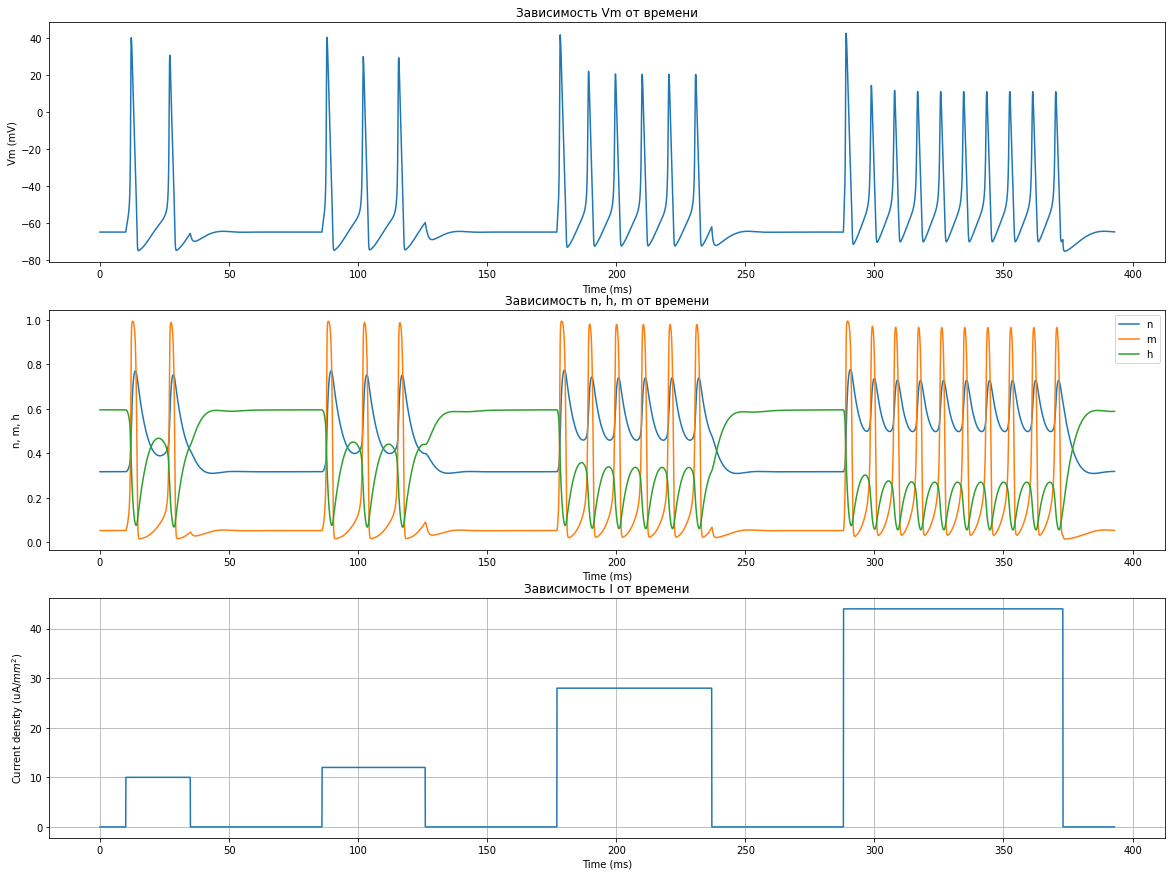

In [31]:
Idv = [Id(t) for t in T]

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (20,15))
ax1.plot(T, Vy[:, 0])
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Vm (mV)')
ax1.set_title('Зависимость Vm от времени')
plt.grid()

ax2.plot(T, Vy[:, 1], label = 'n')
ax2.plot(T, Vy[:, 2], label = 'm')
ax2.plot(T, Vy[:, 3], label = 'h')
ax2.legend()
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('n, m, h')
ax2.set_title('Зависимость n, h, m от времени')
plt.grid()

ax3.plot(T, Idv)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel(r'Current density (uA/$mm^2$)')
ax3.set_title('Зависимость I от времени')
plt.grid()

**Графики симуляции 2.**

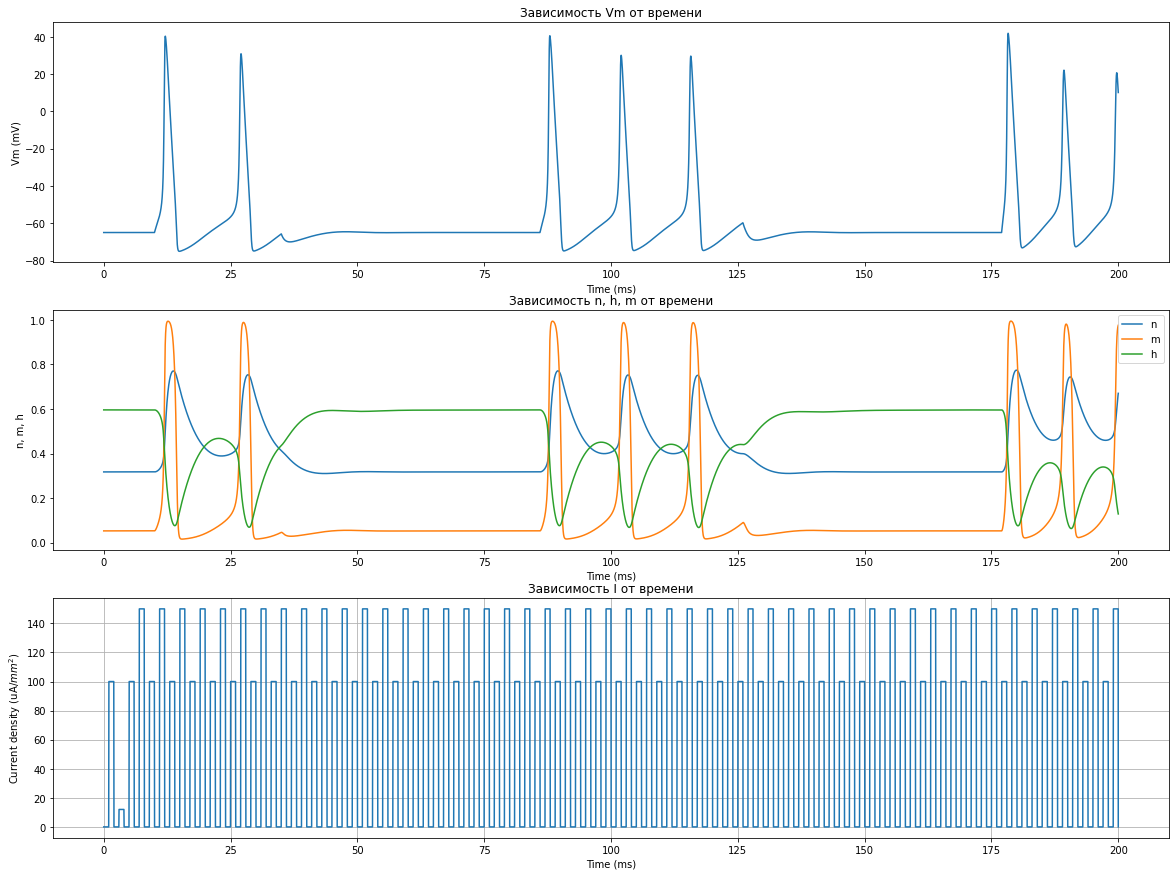

In [32]:
Idv2 = [Id2(t2) for t2 in T2]

fig, (ax4, ax5, ax6) = plt.subplots(3,1, figsize = (20,15))
ax4.plot(T2, Vy2[:, 0])
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('Vm (mV)')
ax4.set_title('Зависимость Vm от времени')
plt.grid()

ax5.plot(T2, Vy2[:, 1], label = 'n')
ax5.plot(T2, Vy2[:, 2], label = 'm')
ax5.plot(T2, Vy2[:, 3], label = 'h')
ax5.legend()
ax5.set_xlabel('Time (ms)')
ax5.set_ylabel('n, m, h')
ax5.set_title('Зависимость n, h, m от времени')
plt.grid()

ax6.plot(T2, Idv2)
ax6.set_xlabel('Time (ms)')
ax6.set_ylabel(r'Current density (uA/$mm^2$)')
ax6.set_title('Зависимость I от времени')
plt.grid()

*2)Графики фазовых пространств для каждого промежутка* **симуляции 1**.

In [29]:
# Четыре промежутка симуляции 1.
gap_1 = []
gap_2 = []
gap_3 = []
gap_4 = []

for i in range(len(Idv)):
  if Idv[i] == st[0]:
    gap_1.append(i)
  elif Idv[i] == st[1]:
    gap_2.append(i)
  elif Idv[i] == st[2]:
    gap_3.append(i)
  elif Idv[i] == st[3]:
    gap_4.append(i)

Text(0.5, 1.0, 'Vm(t) к h(t)')

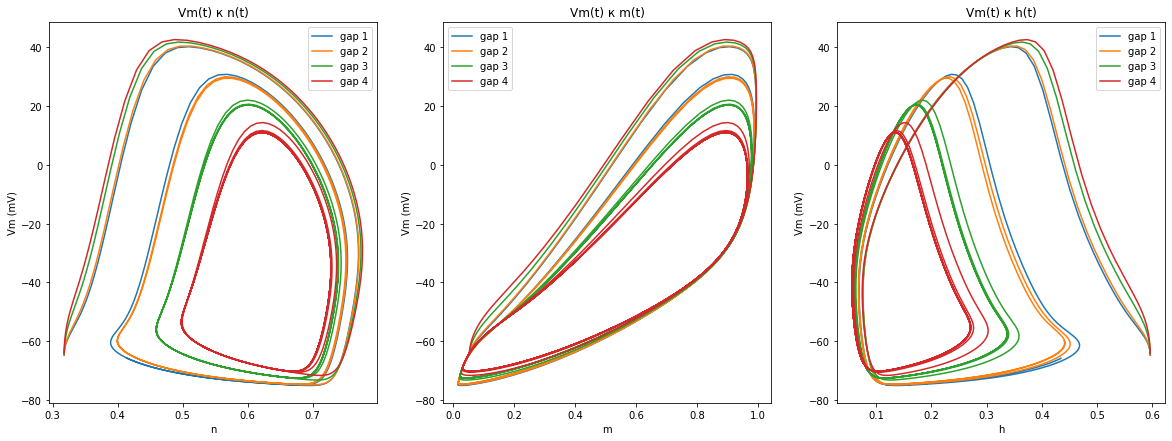

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

ax1.plot(Vy[min(gap_1):max(gap_1), 1], Vy[min(gap_1):max(gap_1), 0], label = 'gap 1')
ax1.plot(Vy[min(gap_2):max(gap_2), 1], Vy[min(gap_2):max(gap_2), 0], label = 'gap 2')
ax1.plot(Vy[min(gap_3):max(gap_3), 1], Vy[min(gap_3):max(gap_3), 0], label = 'gap 3')
ax1.plot(Vy[min(gap_4):max(gap_4), 1], Vy[min(gap_4):max(gap_4), 0], label = 'gap 4')
ax1.legend()
ax1.set_xlabel('n')
ax1.set_ylabel('Vm (mV)')
ax1.set_title('Vm(t) к n(t)')

ax2.plot(Vy[min(gap_1):max(gap_1), 2], Vy[min(gap_1):max(gap_1), 0], label = 'gap 1')
ax2.plot(Vy[min(gap_2):max(gap_2), 2], Vy[min(gap_2):max(gap_2), 0], label = 'gap 2')
ax2.plot(Vy[min(gap_3):max(gap_3), 2], Vy[min(gap_3):max(gap_3), 0], label = 'gap 3')
ax2.plot(Vy[min(gap_4):max(gap_4), 2], Vy[min(gap_4):max(gap_4), 0], label = 'gap 4')
ax2.legend()
ax2.set_xlabel('m')
ax2.set_ylabel('Vm (mV)')
ax2.set_title('Vm(t) к m(t)')

ax3.plot(Vy[min(gap_1):max(gap_1), 3], Vy[min(gap_1):max(gap_1), 0], label = 'gap 1')
ax3.plot(Vy[min(gap_2):max(gap_2), 3], Vy[min(gap_2):max(gap_2), 0], label = 'gap 2')
ax3.plot(Vy[min(gap_3):max(gap_3), 3], Vy[min(gap_3):max(gap_3), 0], label = 'gap 3')
ax3.plot(Vy[min(gap_4):max(gap_4), 3], Vy[min(gap_4):max(gap_4), 0], label = 'gap 4')
ax3.legend()
ax3.set_xlabel('h')
ax3.set_ylabel('Vm (mV)')
ax3.set_title('Vm(t) к h(t)')


**Задание 3. Результат.**

---
Выводы в отдельном md файле.
